<a href="https://colab.research.google.com/github/fadel11-hub/Dicoding-belajar-analisis-data/blob/main/Exploaratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mengeksplorasi Parameter Statistik dari Data

In [2]:
import pandas as pd

city_names = ['Jakarta', 'Bandung', 'Makassar', 'Surabaya', 'Medan', 'Yogyakarta', 'Malang']
population = [498044, 964254, 491918, 8398748, 653115, 883305, 744955]
num_airports = [2, 2, 8, 3, 1, 3, 2]

df = pd.DataFrame({
    'City Name' : city_names,
    'Population' : population,
    'Airports': num_airports,
})

df.describe()

,Population,Airports
count,7.000000e+00,7.000000
mean,1.804906e+06,3.000000
std,2.913095e+06,2.309401
min,4.919180e+05,1.000000
25%,5.755795e+05,2.000000
50%,7.449550e+05,2.000000
75%,9.237795e+05,3.000000
max,8.398748e+06,8.000000


In [3]:
df.describe(include="all")

,City Name,Population,Airports
count,7,7.000000e+00,7.000000
unique,7,NaN,NaN
top,Jakarta,NaN,NaN
freq,1,NaN,NaN
mean,NaN,1.804906e+06,3.000000
std,NaN,2.913095e+06,2.309401
min,NaN,4.919180e+05,1.000000
25%,NaN,5.755795e+05,2.000000
50%,NaN,7.449550e+05,2.000000
75%,NaN,9.237795e+05,3.000000


array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Airports'}>]], dtype=object)

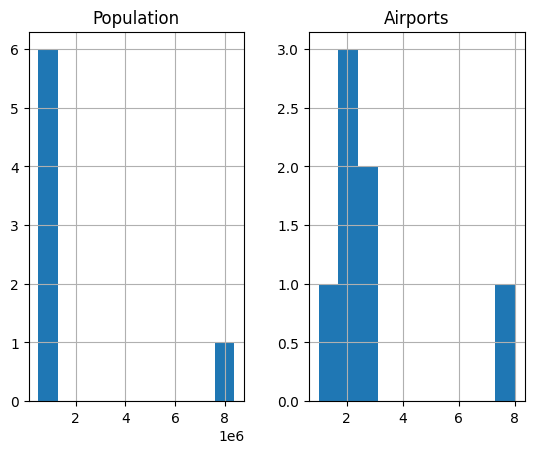

In [5]:
# plot histogram
df.hist()

Berdasarkan plot tersebut, dapat dilihat bahwa data pada kolom Populasi dan Airports memiliki distribusi right-skewed.

Jika ingin memeriksa korelasi antar data numerik pada sebuah DataFrame, Anda dapat menggunakan method corr() atau cov(). Berikut contoh kode untuk melakukannya.



In [7]:
df.corr(numeric_only=True)

,Population,Airports
Population,1.000000,-0.026109
Airports,-0.026109,1.000000


#Mengelompokkan Data


Untuk memahami proses pembuatan pivot table, Anda perlu mengenal dua istilah di bawah ini telebih dahulu.

* Key: kolom yang berisi data kategorik dan digunakan untuk mengelompokkan data.
* Value: kolom yang berisi data kuantitatif dan akan dihitung nilai parameter statistiknya.

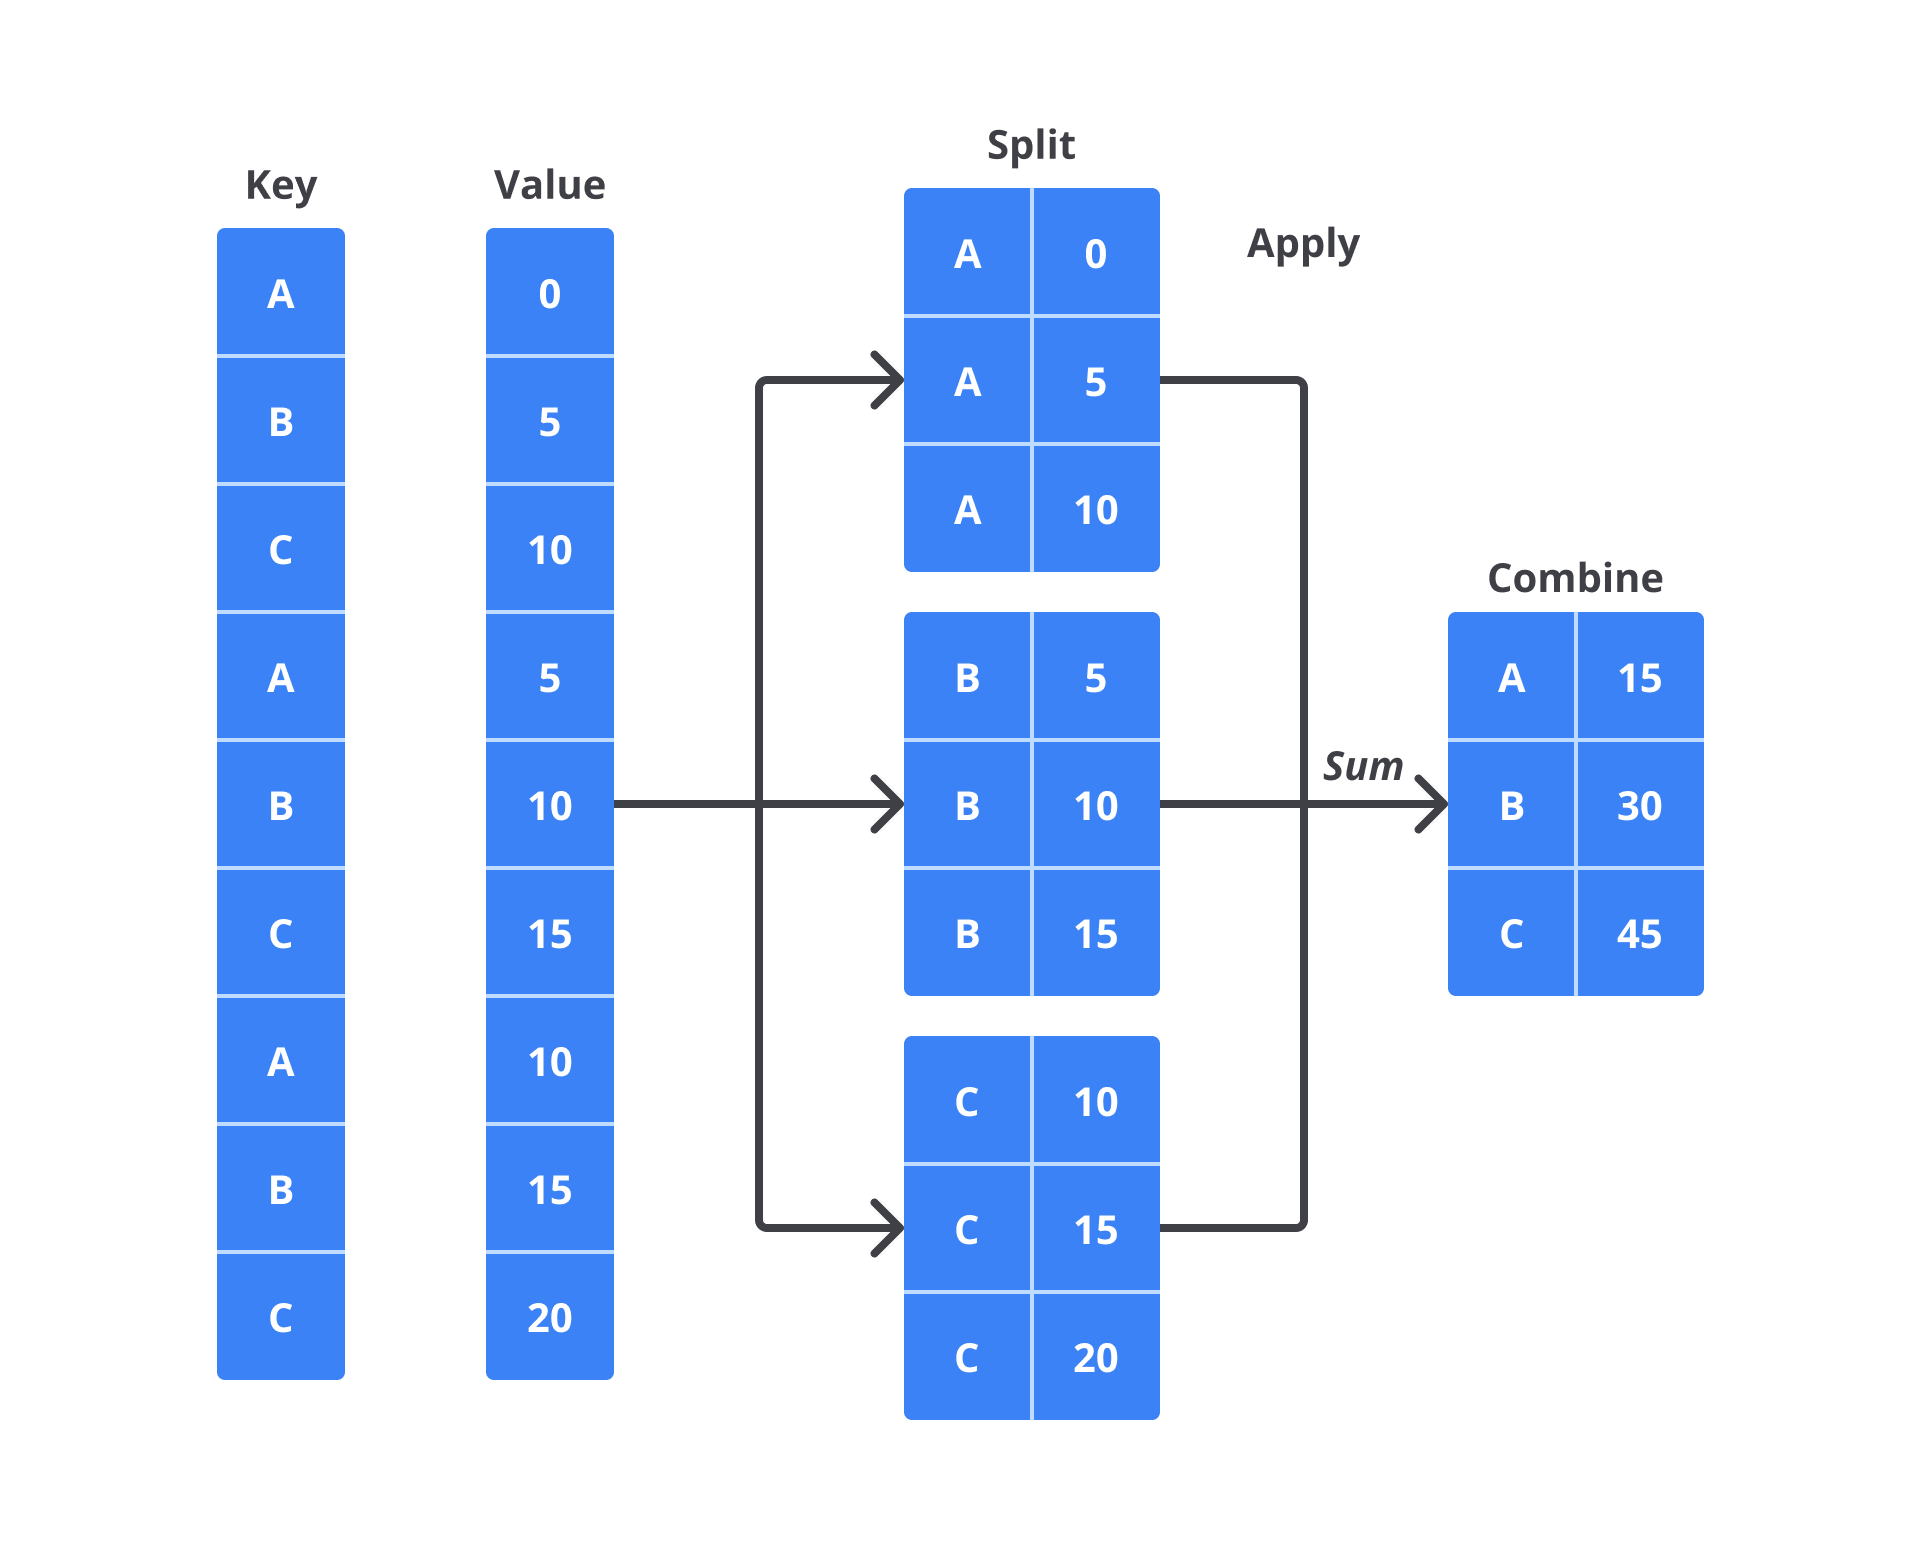

In [10]:
import pandas as pd

body_measurement_df = pd.DataFrame.from_records((
  (2, 83.82, 8.4),
  (4, 99.31, 16.97),
  (3, 96.52, 14.41),
  (6, 114.3, 20.14),
  (4, 101.6, 16.91),
  (2, 86.36, 12.64),
  (3, 92.71, 14.23),
  (2, 85.09, 11.11),
  (2, 85.85, 14.18),
  (5, 106.68, 20.01),
  (4, 99.06, 13.17),
  (5, 109.22, 15.36),
  (4, 100.84, 14.78),
  (6, 115.06, 20.06),
  (2, 84.07, 10.02),
  (7, 121.67, 28.4),
  (3, 94.49, 14.05),
  (6, 116.59, 17.55),
  (7, 121.92, 22.96),
), columns= ('age', 'height_cm', 'weight_cm'))

body_measurement_df.groupby(by ='age').mean()

,height_cm,weight_cm
age,,
2,85.038000,11.2700
3,94.573333,14.2300
4,100.202500,15.4575
5,107.950000,17.6850
6,115.316667,19.2500
7,121.795000,25.6800


bagaimana jika kita ingin membuat pivot table dengan lebih dari **satu parameter**?” Untuk menjawab tantangan ini, kita bisa menggunakan method ***agg()***. Ia memungkinkan kita untuk menentukan beberapa parameter yang ingin digunakan dalam pivot table. Berikut merupakan contoh kode untuk menggunakan method agg().

In [11]:
body_measurement_df.groupby(by='age').agg({
    'height_cm' : 'mean',
    'weight_cm' : ['mean','max', 'min'],
})

height_cm weight_cm              
           mean      mean    max    min
age                                    
2     85.038000   11.2700  14.18   8.40
3     94.573333   14.2300  14.41  14.05
4    100.202500   15.4575  16.97  13.17
5    107.950000   17.6850  20.01  15.36
6    115.316667   19.2500  20.14  17.55
7    121.795000   25.6800  28.40  22.96